# Explorer un corpus

## Imports

In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [2]:
path = "../data/txt/"
files = sorted(os.listdir(path))

In [3]:
len(files)

2826

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [18]:
chaine = 'Bxl_1850_Tome_II1_Part_5.txt'

In [19]:
type(chaine)

str

In [20]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Bxl', '1850', 'Tome', 'II1', 'Part', '5.txt']

In [21]:
# Accéder à l'année
year = chaine_split[1]
year

'1850'

In [22]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'185'

In [23]:
year[-1]

'0'

In [24]:
year[:3] + '0s'

'1850s'

## Quelques statistiques

In [25]:
all_years = [str(year) for year in range(1849, 1976)]

In [26]:
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 1
        count_cities[city] += 1
        count_tomes[tome] += 1
    else:
        print(f"Anomalous file: {f}")

In [27]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles and {count_cities['Lkn']} de Laeken")

Il y a 2675 bulletins de Bruxelles and 151 de Laeken


In [28]:
nb_rap = count_tomes['RptAn']
print(f"{len(files)-nb_rap-1} documents sont des bulletins et {nb_rap} documents sont des rapports annuels")

2643 documents sont des bulletins et 182 documents sont des rapports annuels


In [29]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1853, 1875, 1916, 1917, 1940, 1941, 1942, 1943, 1944


## Visualisation du nombre de bulletins par décennies

Ces visualisations sont obtenus avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

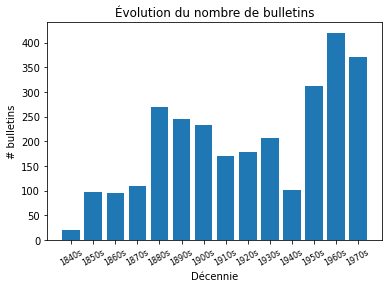

In [30]:
index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('Décennie')
plt.ylabel('# bulletins')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Évolution du nombre de bulletins')
plt.show()